## Keras Classification

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
## import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('../Notebooks_and_Data/DATA/cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

<AxesSubplot:>

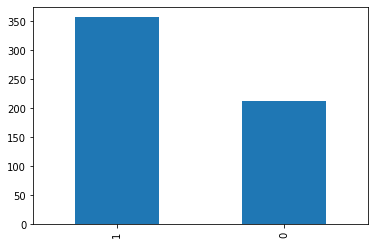

In [6]:
# check the target balance
df['benign_0__mal_1'].value_counts().plot.bar()

In [9]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

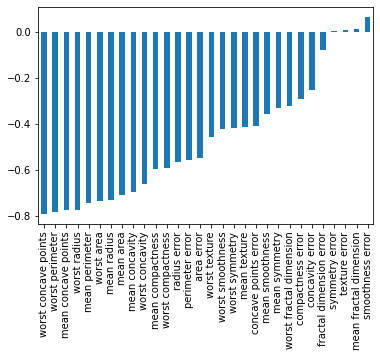

In [11]:
# removing the target label and plot
df.corr()['benign_0__mal_1'][:-1].sort_values().plot.bar()

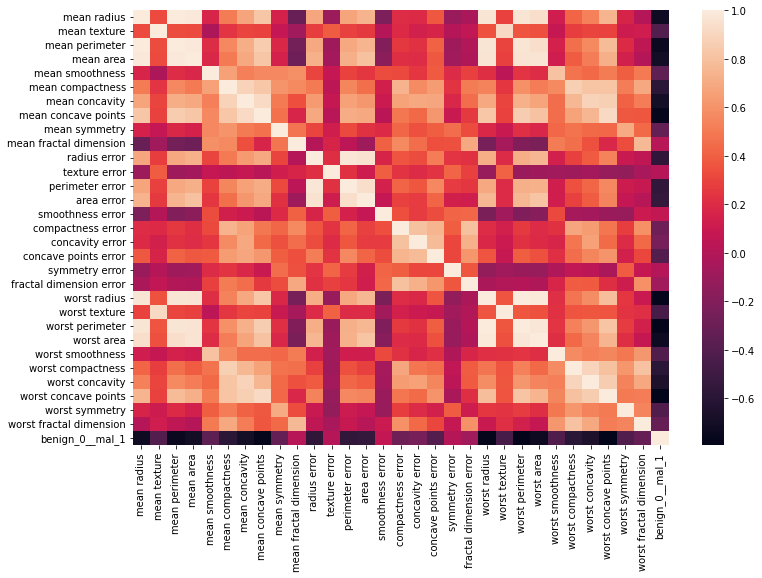

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
plt.show();

- Seems the features are correlated with the target label
- For sake of learning, I will not be performing more feature engineerng like finding correlated features, dropping them and others as such

## Split and train data

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [19]:
# split
X = df.drop('benign_0__mal_1', axis =1)
y = df['benign_0__mal_1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [26]:
## scaling 
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [27]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training and fitting model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
# initialize model
model = Sequential()

# add layers
model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))
# using sigmoid for the output layer as it is a binary classification
model.add(Dense(1, activation = 'sigmoid'))

# compile
model.compile(optimizer='adam', loss='binary_crossentropy')

In [29]:
# now fitting the model
# this is without early stopping
# we are intentionally passing higher number of epochs

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=400,verbose=1)

Epoch 1/400
14/14 [==============================] - 1s 11ms/step - loss: 0.6907 - val_loss: 0.6727
Epoch 2/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6560 - val_loss: 0.6396
Epoch 3/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6190 - val_loss: 0.6026
Epoch 4/400
14/14 [==============================] - 0s 4ms/step - loss: 0.5781 - val_loss: 0.5587
Epoch 5/400
14/14 [==============================] - 0s 4ms/step - loss: 0.5329 - val_loss: 0.5097
Epoch 6/400
14/14 [==============================] - 0s 4ms/step - loss: 0.4835 - val_loss: 0.4583
Epoch 7/400
14/14 [==============================] - 0s 4ms/step - loss: 0.4345 - val_loss: 0.4063
Epoch 8/400
14/14 [==============================] - 0s 4ms/step - loss: 0.3872 - val_loss: 0.3574
Epoch 9/400
14/14 [==============================] - 0s 4ms/step - loss: 0.3442 - val_loss: 0.3174
Epoch 10/400
14/14 [==============================] - 0s 4ms/step - loss: 0.3079 - val_loss: 0.2757
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0536 - val_loss: 0.1158
Epoch 84/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0536 - val_loss: 0.1064
Epoch 85/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0560 - val_loss: 0.1091
Epoch 86/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0557 - val_loss: 0.1084
Epoch 87/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0529 - val_loss: 0.1090
Epoch 88/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0521 - val_loss: 0.1054
Epoch 89/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0507 - val_loss: 0.1162
Epoch 90/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0534 - val_loss: 0.1080
Epoch 91/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0513 - val_loss: 0.1090
Epoch 92/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0511 - val_loss: 0.1111
Epoch 93/400


14/14 [==============================] - 0s 3ms/step - loss: 0.0480 - val_loss: 0.1251
Epoch 165/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0433 - val_loss: 0.1269
Epoch 166/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0420 - val_loss: 0.1206
Epoch 167/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0422 - val_loss: 0.1215
Epoch 168/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0422 - val_loss: 0.1207
Epoch 169/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0438 - val_loss: 0.1263
Epoch 170/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.1212
Epoch 171/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0410 - val_loss: 0.1353
Epoch 172/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0445 - val_loss: 0.1249
Epoch 173/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0426 - val_loss: 0.1247
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0365 - val_loss: 0.1294
Epoch 246/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.1457
Epoch 247/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0414 - val_loss: 0.1299
Epoch 248/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0371 - val_loss: 0.1325
Epoch 249/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0365 - val_loss: 0.1338
Epoch 250/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0367 - val_loss: 0.1467
Epoch 251/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0380 - val_loss: 0.1300
Epoch 252/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0390 - val_loss: 0.1408
Epoch 253/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0373 - val_loss: 0.1342
Epoch 254/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0354 - val_loss: 0.1312
Epoc

14/14 [==============================] - 0s 3ms/step - loss: 0.0335 - val_loss: 0.1481
Epoch 327/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.1441
Epoch 328/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.1528
Epoch 329/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0313 - val_loss: 0.1498
Epoch 330/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0313 - val_loss: 0.1449
Epoch 331/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0318 - val_loss: 0.1465
Epoch 332/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0300 - val_loss: 0.1518
Epoch 333/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0294 - val_loss: 0.1394
Epoch 334/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0331 - val_loss: 0.1533
Epoch 335/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0300 - val_loss: 0.1507
Epoc

<AxesSubplot:>

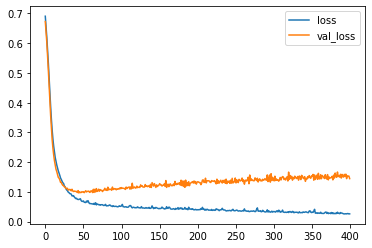

In [30]:
pd.DataFrame(model.history.history).plot()

- Here we can clearly see that our model overfitting with the noise of the training data after say around 50 epochs
- Now, we will try to do early stopping when the model started overfitting

## Adding Early Stopping

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
help(EarlyStopping)

Help on class EarlyStopping in module keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify 

In [33]:
# initialize the early stop object
early_stop = EarlyStopping(monitor='val_loss', # quantity to be monitored, in our case is val_loss
                           # to define the criterion for early stopping
                          patience=25, # no. of epochs to continue checking even after the model starts overfitting
                          verbose=1,
                          mode='min', # indicates the mode, in our case we are trying to minimize val_loss, so min
                          )

In [34]:
# initialize the model 
# we are using the same model
model = Sequential()

# add layers
model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))
# using sigmoid for the output layer as it is a binary classification
model.add(Dense(1, activation = 'sigmoid'))

# compile
model.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
# fit the model, now with early stopping

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=400,
          verbose=1,
          callbacks=[early_stop] # passing early stop object
         )

Epoch 1/400
14/14 [==============================] - 1s 10ms/step - loss: 0.6886 - val_loss: 0.6681
Epoch 2/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6546 - val_loss: 0.6349
Epoch 3/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6182 - val_loss: 0.5974
Epoch 4/400
14/14 [==============================] - 0s 4ms/step - loss: 0.5793 - val_loss: 0.5575
Epoch 5/400
14/14 [==============================] - 0s 4ms/step - loss: 0.5360 - val_loss: 0.5110
Epoch 6/400
14/14 [==============================] - 0s 4ms/step - loss: 0.4863 - val_loss: 0.4537
Epoch 7/400
14/14 [==============================] - 0s 4ms/step - loss: 0.4320 - val_loss: 0.4009
Epoch 8/400
14/14 [==============================] - 0s 4ms/step - loss: 0.3843 - val_loss: 0.3523
Epoch 9/400
14/14 [==============================] - 0s 4ms/step - loss: 0.3402 - val_loss: 0.3124
Epoch 10/400
14/14 [==============================] - 0s 4ms/step - loss: 0.3046 - val_loss: 0.2799
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0563 - val_loss: 0.1081
Epoch 84/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0573 - val_loss: 0.1015
Epoch 85/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0569 - val_loss: 0.1077
Epoch 86/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0558 - val_loss: 0.1055
Epoch 87/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0550 - val_loss: 0.1113
Epoch 88/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0562 - val_loss: 0.1053
Epoch 89/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0559 - val_loss: 0.1061
Epoch 90/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0541 - val_loss: 0.1073
Epoch 91/400
14/14 [==============================] - 0s 4ms/step - loss: 0.0533 - val_loss: 0.1089
Epoch 92/400
14/14 [==============================] - 0s 3ms/step - loss: 0.0535 - val_loss: 0.1086
Epoch 93/400


- Now we can see, it stop training at 109 epoch

<AxesSubplot:>

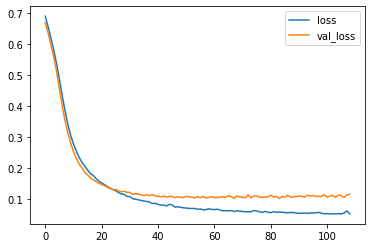

In [37]:
# check the loss scores
pd.DataFrame(model.history.history).plot()

- We can see the model stops training, once the condition for early stopping is met

## Adding Dropout Layers

In [38]:
from tensorflow.keras.layers import Dropout

In [39]:
# initialize the model again
# we are using the same model
model = Sequential()

# add layers
model.add(Dense(30, activation = 'relu'))
# adding dropout
model.add(Dropout(0.5)) # percentage of neurons drop out in each epoch
                        # this selection of 50% is totally random, this is to avoid overfiting

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

# using sigmoid for the output layer as it is a binary classification
model.add(Dense(1, activation = 'sigmoid'))

# compile
model.compile(optimizer='adam', loss='binary_crossentropy')

In [40]:
# fit the model, now with early stopping

model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=400,
          verbose=1,
          callbacks=[early_stop] # passing early stop object
         )

Epoch 1/400
14/14 [==============================] - 1s 12ms/step - loss: 0.7086 - val_loss: 0.6899
Epoch 2/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6821 - val_loss: 0.6751
Epoch 3/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6707 - val_loss: 0.6632
Epoch 4/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6584 - val_loss: 0.6501
Epoch 5/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6482 - val_loss: 0.6302
Epoch 6/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6375 - val_loss: 0.6019
Epoch 7/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6124 - val_loss: 0.5700
Epoch 8/400
14/14 [==============================] - 0s 4ms/step - loss: 0.6004 - val_loss: 0.5380
Epoch 9/400
14/14 [==============================] - 0s 4ms/step - loss: 0.5691 - val_loss: 0.5081
Epoch 10/400
14/14 [==============================] - 0s 4ms/step - loss: 0.5372 - val_loss: 0.4798
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.1192 - val_loss: 0.1115
Epoch 84/400
14/14 [==============================] - 0s 4ms/step - loss: 0.1096 - val_loss: 0.1034
Epoch 85/400
14/14 [==============================] - 0s 4ms/step - loss: 0.1421 - val_loss: 0.1060
Epoch 86/400
14/14 [==============================] - 0s 4ms/step - loss: 0.1178 - val_loss: 0.1024
Epoch 87/400
14/14 [==============================] - 0s 4ms/step - loss: 0.1155 - val_loss: 0.1156
Epoch 88/400
14/14 [==============================] - 0s 3ms/step - loss: 0.1246 - val_loss: 0.0932
Epoch 89/400
14/14 [==============================] - 0s 4ms/step - loss: 0.1268 - val_loss: 0.1116
Epoch 90/400
14/14 [==============================] - 0s 4ms/step - loss: 0.1364 - val_loss: 0.1041
Epoch 91/400
14/14 [==============================] - 0s 4ms/step - loss: 0.1289 - val_loss: 0.0956
Epoch 92/400
14/14 [==============================] - 0s 4ms/step - loss: 0.1153 - val_loss: 0.1108
Epoch 93/400


<AxesSubplot:>

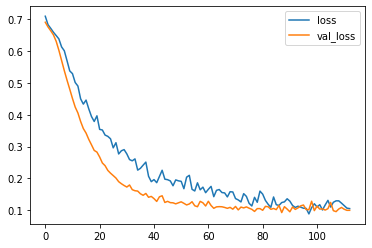

In [41]:
pd.DataFrame(model.history.history).plot()

- This is a very good model performance, an ideal one

## Evaluation

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [52]:
#test_preds = model.predict_classes(X_test)
# need to perform this as we have use sigmoid function in our output layer and it gives a probability value instead
# of class labels as predition

predict_x = model.predict(X_test) 
test_preds = np.where(predict_x > 0.5,1, 0)

5/5 [==============================] - 0s 2ms/step


In [53]:
test_preds

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [55]:
accuracy_score(y_test, test_preds)

0.965034965034965

In [56]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [57]:
confusion_matrix(y_test, test_preds)

array([[54,  1],
       [ 4, 84]], dtype=int64)